# Electrical dipole field

Assuming two changes $q$ of opposite sign located at $+d$ and $-d$ on the $x$ axis, the intensity of the $E$ field at position $(x,y)$ is:

$$E(r) = \frac{1}{4\pi\varepsilon_0} \left[ \frac{q}{r_+^2} - \frac{q}{r_-^2} \right]$$

where $r_+=\sqrt{(d+x)^2+y^2}$ and $r_-=\sqrt{(d-x)^2+y^2}$ are the respective distances from the charges.

The $x$ and $y$ components of $E(x,y)$ are:

$$
E_+ = \frac{1}{4\pi\varepsilon_0} \frac{q}{r_+^2},
E_{+x} = E_+ \frac{d+x}{r_+}, 
E_{+y} = E_+ \frac{y}{r_+} $$

$$
E_- = \frac{1}{4\pi\varepsilon_0} \frac{-q}{r_-^2},
E_{-x} = E_- \frac{x-d}{r_-}, 
E_{-y} = E_- \frac{y}{r_-}
$$

$$E_{x} = E_+ \frac{d+x}{r_+} + E_- \frac{d-x}{r_-}$$
$$E_{y} = E_+ \frac{y}{r_+} + E_- \frac{y}{r_-}$$

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def dipoleE(x,y,d=1.,q=1.,K=1.):
    rp2 = (d+x)**2+y**2
    rm2 = (d-x)**2+y**2
    Ep =  K*q/rp2
    Em = -K*q/rm2
    rp = np.sqrt(rp2)
    rm = np.sqrt(rm2)
    Ex = Ep*(d+x)/rp + Em*(x-d)/rm
    Ey = Ep*y/rp + Em*y/rm
    return Ex,Ey

In [33]:
eps0 = 8.8541878128e-12 # vacuum permittivity
K = 1./(4.*np.pi*eps0)
q = 1.6e-19 # electron/proton charge in Coulumb
d = 3e-10

In [34]:
xmin,xmax = -5.*d,5.*d
ymin,ymax = -5.*d,5.*d
nx, ny = 100,100
x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)
X, Y = np.meshgrid(x, y)

In [35]:
Ex, Ey = dipoleE(X,Y,d=d,q=q,K=K)

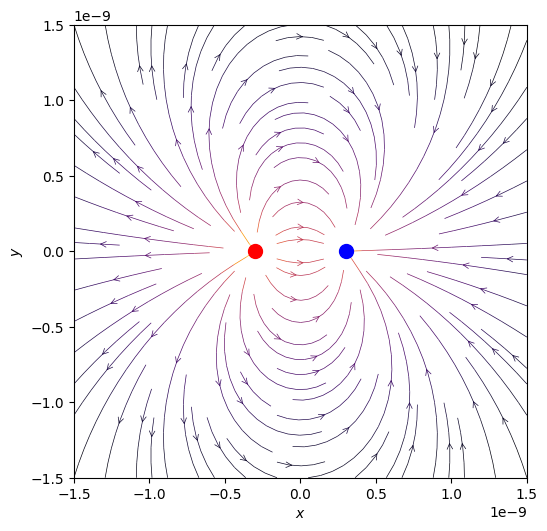

In [36]:
fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(111)

ax.streamplot(X, Y, Ex, Ey, color=np.log(np.sqrt(Ex**2+Ey**2)),
              linewidth=0.5, cmap=plt.cm.inferno, density=1, arrowstyle='->', arrowsize=1)

ax.plot(-d,0,"o",markersize=10,color="red")
ax.plot(+d,0,"o",markersize=10,color="blue")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_aspect('equal')
plt.show()

# Motion of charge in dipole field

I'll assume the charge won't perturb the field (e.g. it's small with respect to the dipole generating the field). If $q$ is the charge in position ($x$,$y$), it will feel a force:

$$ \vec{F} = q\vec{E} $$

where $\vec{E} = (E_x,E_y)$ is the field discussed above. If the charge corresponds to a particle of mass $m$ I'll have:

$$ m\frac{d^2 r}{dt^2} = q \vec{E}$$

that can be rewritten as a system of differential equations:

$$\left\{\begin{eqnarray}
\frac{d\vec{r}}{dt} & = & \vec{v} \\
\frac{d\vec{v}}{dt} & = & \frac{q}{m} \vec{E} 
\end{eqnarray}\right.$$

In [37]:
def dipole_dt(X,t,q=1.,m=1.,d=1.,Q=1.,K=1.):
    x,y,vx,vy = X
    # compute E field components
    rp2 = (d+x)**2+y**2
    rm2 = (d-x)**2+y**2
    Ep =  K*Q/rp2
    Em = -K*Q/rm2
    rp = np.sqrt(rp2)
    rm = np.sqrt(rm2)
    Ex = Ep*(d+x)/rp + Em*(x-d)/rm
    Ey = Ep*y/rp + Em*y/rm
    # compute derivative
    return vx,vy,q/m*Ex,q/m*Ey

Numerical value and proper convergence of numerical integration of the differential equation system can be tricky! 

Below a few "real life" values that works ok-ish

In [38]:
tmax = 0.01
dt   = 0.00000001 # Such a small time update is needed to get a stable numerical integration, 
                  # but will make the numerber of available points huge!
t = np.arange(0, tmax+dt, dt)

In [39]:
d = 0.04e-2 # m
Q = 5e-9    # C
q = 1.6e-19 # C
m = 5.0e-18 # g

In [40]:
from scipy.integrate import odeint

q1 = -q
X01 = [-5.*d,5.*d,10,2]
X1 = odeint(dipole_dt, X01, t, args=(q1,m,d,Q,K))
x1,y1 = X1[:,0], X1[:,1]

q2 = q
X02 = [5.*d,-5.*d,-10,-2]
X2 = odeint(dipole_dt, X02, t, args=(q2,m,d,Q,K))
x2,y2 = X2[:,0], X2[:,1]

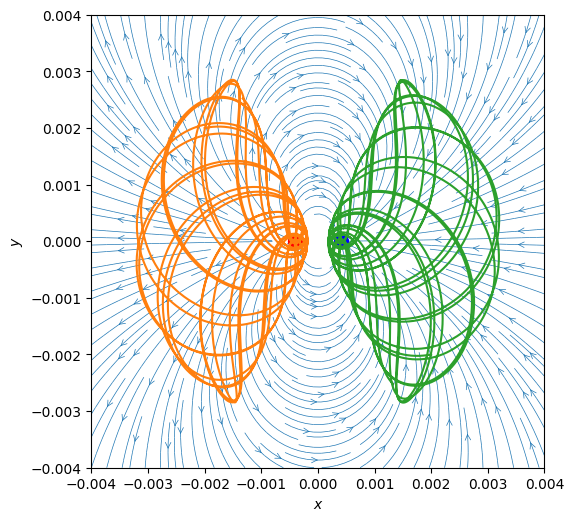

In [41]:
xmin,xmax = -10.*d,10.*d
ymin,ymax = -10.*d,10.*d

nx, ny = 100,100
xe = np.linspace(xmin,xmax,nx)
ye = np.linspace(ymin,ymax,ny)
Xe, Ye = np.meshgrid(xe, ye)
Ex, Ey = dipoleE(Xe,Ye,d=d,q=Q,K=K)

fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(111)

ax.streamplot(Xe, Ye, Ex, Ey, #color=np.log(np.sqrt(Ex**2+Ey**2)),
              linewidth=0.5, cmap=plt.cm.inferno, density=2, arrowstyle='->', arrowsize=1)

ax.plot(-d,0,"o",markersize=10,color="red")
ax.plot(+d,0,"o",markersize=10,color="blue")

ax.plot(x1,y1,"-")
ax.plot(x2,y2,"-")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_aspect('equal')
plt.show()

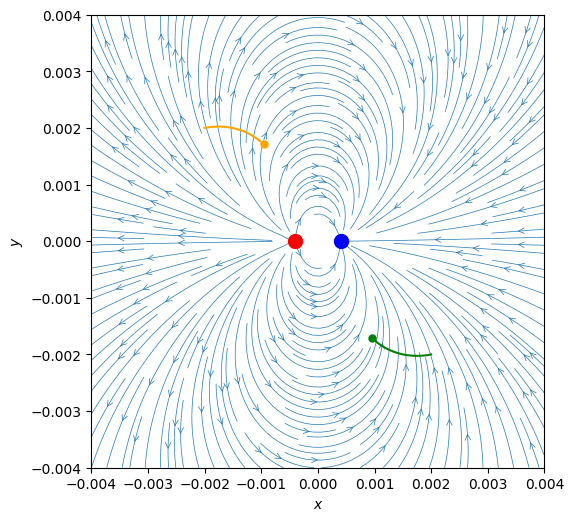

In [42]:
i = 10000

xmin,xmax = -10.*d,10.*d
ymin,ymax = -10.*d,10.*d
nx, ny = 100,100
xe = np.linspace(xmin,xmax,nx)
ye = np.linspace(ymin,ymax,ny)
Xe, Ye = np.meshgrid(xe, ye)
Ex, Ey = dipoleE(Xe,Ye,d=d,q=Q,K=K)

fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(111)
ax.streamplot(Xe, Ye, Ex, Ey, linewidth=0.5, cmap=plt.cm.inferno, density=2, arrowstyle='->', arrowsize=1)
ax.plot(-d,0,"o",markersize=10,color="red")
ax.plot(+d,0,"o",markersize=10,color="blue")

ax.plot(x1[:i],y1[:i],"-",color="orange")
ax.plot(x1[i],y1[i],"o",markersize=5,color="orange")
ax.plot(x2[:i],y2[:i],"-",color="green")
ax.plot(x2[i],y2[i],"o",markersize=5,color="green")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_aspect('equal')
plt.show()

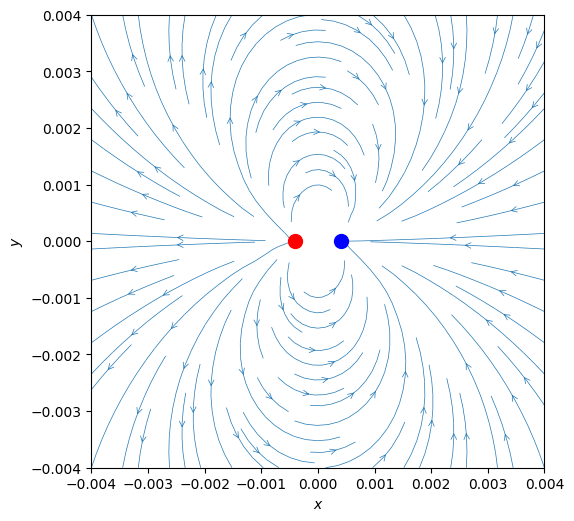

In [57]:
xmin,xmax = -10.*d,10.*d
ymin,ymax = -10.*d,10.*d

fig = plt.figure(figsize=(6,6),dpi=100)
ax = fig.add_subplot(111)

nx, ny = 20, 20
xe = np.linspace(xmin,xmax,nx)
ye = np.linspace(ymin,ymax,ny)
Xe, Ye = np.meshgrid(xe, ye)
Ex, Ey = dipoleE(Xe,Ye,d=d,q=Q,K=K)
ax.streamplot(Xe, Ye, Ex, Ey, linewidth=0.5, cmap=plt.cm.inferno, density=1, arrowstyle='->', arrowsize=1)

ax.plot(-d,0,"o",markersize=10,color="red")
ax.plot(+d,0,"o",markersize=10,color="blue")

l1, = ax.plot([],[],"-",color="orange")
p1, = ax.plot([],[],"o",markersize=5,color="orange")
l2, = ax.plot([],[],"-",color="green")
p2, = ax.plot([],[],"o",markersize=5,color="green")

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_aspect('equal')
plt.show()

In [62]:
from matplotlib.animation import FuncAnimation, FFMpegWriter
%matplotlib inline
from IPython.display import HTML, Image

def charges_init():
    l1.set_data([],[])
    p1.set_data([],[])
    l2.set_data([],[])
    p2.set_data([],[])
    return (l1,)

def charges_animate(i):
    l1.set_data(x1[:i],y1[:i])
    p1.set_data(x1[i],y1[i])
    l2.set_data(x2[:i],y2[:i])
    p2.set_data(x2[i],y2[i])
    return (l1,)

# reduce the number of points to prodice the animation, otherwise the file would be enourmous!
anim = FuncAnimation(fig,charges_animate,frames=range(0,len(t),10000),init_func=charges_init,blit=True)

In [63]:
HTML(anim.to_html5_video())

In [67]:
anim.save('movies/charges_dipole.mp4', writer=FFMpegWriter(fps=10))

In [68]:
anim.save('gifs/charges_dipole.gif', writer=FFMpegWriter(fps=10))

In [69]:
Image(url='gifs/charges_dipole.gif')